# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set()
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('data/human_body_temperature.csv')
print(df.shape, df.columns)
print(df.head())
print(df[df["gender"] == "M"].shape, df[df["gender"] == "F"].shape)

(130, 3) Index(['temperature', 'gender', 'heart_rate'], dtype='object')
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
(65, 3) (65, 3)


## Question 1 & 2. Is the distribution of the body temperatures normal/Is the sample size large?
According to the lecture materials, for this type of scenario there are 3 ways of determining normality:
1. That the underlying parent population is normal
  * This is true (http://www.stat.wisc.edu/~st571-1/07-normal-4.pdf)
2. That the sample size is greater than or equal to 30 (from the CLT)
  * This is also true. Our sample size is 130 which is greather than or equal to 30. (https://www.youtube.com/watch?v=GtokpL4f32s)
3. That our sample is symmetric and has no outliers
  * We can graphically test this as followed below:

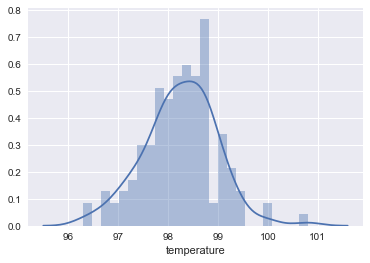

In [38]:
_ = sns.distplot(df.temperature, bins = 25)

Here we see that our data is strongly skewed towards the left, where the data has a sharp cutoff at around $100^{\circ}F$. However, since our previous two conditions were satisfied, we will continue with the exercise assuming that the distribution is indeed normal. Regarding the condition of whether or not our sample's observations are independent, although we do *not* know whether or not the sampling data was taken with replacement, we do know that it is less than or equal to 10% of the total population. Therefore we conclude that the data's sample size is large enough for the CLT and that it contains independent observations. Lastly, we cite from the source material that the data collected is a *random sample*, satisfying all the criteria needed to conduct a statistical test.

## Question 3. Is the true population mean really $98.6^{\circ}F$?
In both our bootstrap and frequentists tests, we will consider the null hypothesis that the mean of the $98.6^{\circ}F$ holds true. That is:
* $H_{0} =$ The true mean of the human population's body temperature is $98.6^{\circ}F$. 
* $H_{a} =$ The true mean of the human population's body temperature is **not** $98.6^{\circ}F$.

We will also be moving forwarding with all our testing at an alpha level of $\alpha = .05$.
### Bootstrap Method:

In [39]:
temps = df.temperature

# Define bootstrap replicates function
def draw_bs_reps(data, func, size = 1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

# Translate our temperatures assuming the null hypothesis is correct
translated_temps = temps - np.mean(temps) + 98.6

# Draw bootstrap replicates of the mean temperature
bs_replicates = draw_bs_reps(translated_temps, np.mean, size = 150)

# Compute fraction of replicates that are less than the accepted temperature value: p_bs
p_bs = np.sum(bs_replicates <= np.mean(temps)) / len(bs_replicates)
print("p = ", p_bs)

p =  0.0


Looking at our calculations, we see that using bootstrap methods gives us a p-value of 0.0. Since our p-value is incredibly small, we *reject* the null hypothesis utilizing the bootstrap method. However, this does not take into account the fact that we're sampling over both female and male samples, a variable that could effect our sample mean. However, let's move forward with the assignment. More specifically, let's investigate frequentist statistical methods.

### Frequentist Method:
Now let's conduct our statistical testing using frequentist methods. Because our null hypothesis states that true mean of the *total* human population's body temperature is $98.6^{\circ}F$, the one-sample test satisfies our requirements. In this situation, it is more appropriate to do a $t$ test because we don't know the total population's standard deviation. Therefore we expect that the results from a $t$ test will be more accurate than one of a $z$ test:

#### One-sample *t* test (two-tailed):
Althought we have a library (scipy.stats) that allows to do this test just by specifying the array and the mean we're testing against, let's start by doing a calculation by hand. That is, we use:
<font size = 4> $t = \frac{\overline{X} - \mu}{\frac{S}{\sqrt{n}}}$ </font>

In [40]:
t_eq = (np.mean(temps) - 98.6) / (np.std(temps)/np.sqrt(len(temps)))
print(t_eq)

-5.475925202078116


For this $t$ value, we look at a table to find that our $p < .00001$. Now let's use the scipy.stats package to conduct the same test to double check our answer.

In [41]:
t_calc, p_calc = stats.ttest_1samp(temps, 98.6)
print("t-value =", t_calc)
print("p-value =", p_calc)

t-value = -5.4548232923645195
p-value = 2.4106320415561276e-07


The above $t$ and $p$ values match (to 2 significant figures) with what we've calculated. These results indicate that we *reject* the null hypothesis.
#### Two-sample *t* test (two-tailed):
For this test, we will be comparing the values of the female group to those of the male group assuming the null hypothesis is true (also known as an independent samples $t$ test). This implies that there should be no difference between the true mean human body temperature for female and the true mean body temperature for males. This is given by:
<font size = 4>$t = \frac{\overline{X_{1}}-\overline{X_2}}{s_{p}\sqrt{\frac{2}{n}}}$</font>

Where $s_{p}$ is the pooled standard deviation as given by:
<font size = 4>$s_{p} = \sqrt{\frac{s_{X_{1}}^2 + s_{X_{2}}^2}{2}}$</font>

In [42]:
# Let's split up our data into two samples: male and female.
male_temps = df[df["gender"] == "M"].temperature
female_temps = df[df["gender"] == "F"].temperature
print(male_temps.shape, female_temps.shape)

(65,) (65,)


In [43]:
# Since we're working with an n-value that's the same across both datasets, we can continue with our independent sample t-test
n = 65
male_temps_avg = np.mean(male_temps)
male_temps_std = np.std(male_temps)
female_temps_avg = np.mean(female_temps)
female_temps_std = np.std(female_temps)
s_p = np.sqrt((male_temps_std ** 2 + female_temps_std ** 2)/2)
t_eq_two = (male_temps_avg - female_temps_avg)/(s_p * np.sqrt(2/n))
print(t_eq_two)

-2.303220289194013


In [44]:
# Looking at a t-table for a two-tailed test, we find the corresponding p-value
p_eq_two = .024719
print("t-value =", t_eq_two)
print("p-value =", p_eq_two)

t-value = -2.303220289194013
p-value = 0.024719


In [45]:
# Now let's utilize our scipy.stats library to check our answers
t_calc_two, p_calc_two = stats.ttest_ind(male_temps, female_temps)
print("t-value =", t_calc_two)
print("p-value =", p_calc_two)

t-value = -2.2854345381656103
p-value = 0.02393188312239561


Within two significant figures, we see that our values match. However, now we have $p$-values that are significantly higher than the ones calculated using the one-sample $t$-test. Since one of the critera for conducing this independent samples test is that the two sets of data are independent of each other, this increase in p-value suggests that there *is* a dependency on whether or not the sample candidate is male or female. 

## Question 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. Which one is the correct one to use? What do you notice? What does this tell you about the difference in application of the $t$  and  $z$  statistic?

Now we will conduct all the above frequentist statistical testing again on a new sample data of 10 data points randomly collected from our total sample data. We begin by creating our creating our new sample data sets.

In [46]:
# New sample data generation
temps_10 = np.empty(10)
for i in range(10):
    temps_10[i] = np.random.choice(temps)

male_temps_5 = np.empty(5)
female_temps_5 = np.empty(5)
for i in range(5):
    male_temps_5[i] = np.random.choice(male_temps)
    female_temps_5[i] = np.random.choice(female_temps)

In [47]:
# One-sample t-test
t_10_calc, p_10_calc = stats.ttest_1samp(temps_10, 98.6)
print("t-value =", t_10_calc)
print("p-value =", p_10_calc)

t-value = -3.69507787854565
p-value = 0.004958218469660159


In [48]:
# Two-sample t-test
t_5_calc_two, p_5_calc_two = stats.ttest_ind(male_temps_5, female_temps_5)
print("t-value =", t_5_calc_two)
print("p-value =", p_5_calc_two)

t-value = -0.9442069748194072
p-value = 0.37270241949818617


Looking at our new $t$ and $p$-values from this randomly selected data, in order for us to make the same conclusions as we've done above (reject the null hypothesis) it's clear that the one-sample test is the correct one to use, as it's the only one that satisfies our criteria of having a value that's less than our initial statement of $\alpha =.05$. In addition, we notice that our two-sample test has resulted in values that are drastically different than the ones we've calculated earlier. This is an example that highlights the difference in $t$ and $z$ statistics: namely, $t$ statistics heavily rely on us having a large enough sample size for us to garner statistically accurate results (namely, how the t-statistic is proportional to the standard deviation of our tested sample) while a $z$ statistic relies on information regarding the total sample population.

## Question 5. At what temperature should we consider someone's temperature to be "abnormal"? As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

For this question, we will be using our total sample set of data and instead of testing it against a known value, we will be trying to calculate a range of values that we can consider to be "normal". Here, I will state that my range of normal values will only include values that fall within an interval that captures 90% of the data. The values at which this no longer holds true for our data will be the temperatures that the sample candidate no longer as a "normal" body temperature. We will do this using both bootstrap and frequentist statistics (ignoring the 2-sample test, as we know that the two data sets are *not* independent of each other)
### Bootstrap Method:

In [49]:
# Draw bootstrap replicates of the mean temperature
abnormal_bs_replicates = draw_bs_reps(translated_temps, np.mean, size = 150)

ab_bs_rep_mean = np.mean(abnormal_bs_replicates)
ab_bs_rep_std = np.std(abnormal_bs_replicates)
t_90 = 1.655 #found on (https://www.medcalc.org/manual/t-distribution.php)

#Compute confidence interval that includes 90% of the data
abnormal_conf_int = np.percentile(abnormal_bs_replicates, [5, 95])

print('Average Temperature =', ab_bs_rep_mean)
print('90% confidence interval =', abnormal_conf_int)
print('Margin of error =', t_90 * ab_bs_rep_std)

Average Temperature = 98.59901025641024
90% confidence interval = [98.49061538 98.69730769]
Margin of error = 0.10272106683395613


### Frequentist Method (One-sample *t* test):

In [50]:
temps_mean = np.mean(temps)
temps_std = np.std(temps)
n = len(temps)
margin_90 = t_90 * temps_std

print("Average Temperature =", temps_mean)
print("90% confidence interval =", [temps_mean - margin_90, temps_mean + margin_90])
print("Margin of error =", margin_90)

Average Temperature = 98.24923076923078
90% confidence interval = [97.04048864514294, 99.45797289331861]
Margin of error = 1.2087421240878375


From the bootstrap method, we see that an abnormal temperature would be any temperature outside of the interval $98.7^{\circ}F$ to $98.5^{\circ}F$. From the frequentist method, this range is any temperature outside of the interval $97.0^{\circ}F$ and $99.5^{\circ}F$. Using common sense, we can see that the frequentist method provides us with a much more accurate description of what an abnormal temperature is. To investigate further, let's plot these two distributions against each other:

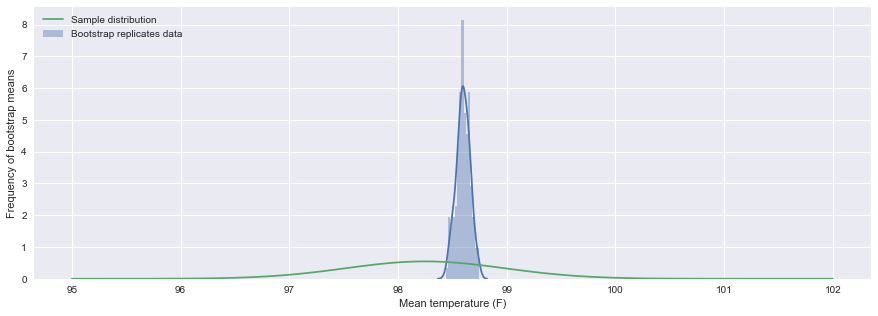

In [51]:
_ = plt.figure(figsize = (15, 5))
_ = sns.distplot(abnormal_bs_replicates, bins = 15, label = "Bootstrap replicates data", hist = True)
x = np.linspace(95, 102, 100)
y_sample = stats.norm.pdf(x, temps_mean, temps_std)
_ = plt.plot(x, y_sample, label='Sample distribution')
_ = plt.xlabel("Mean temperature (F)")
_ = plt.ylabel("Frequency of bootstrap means")
_ = plt.legend(loc = "upper left")
plt.show()

Immediately, we notice something about this plot: The bootstrap replicates' data has a much higher kertosis than our sample mean data. This implies that our sample data has a much wider range of values compared to the simluated values. This makes sense as we know that we're sampling across both female and male data samples in the original list (which we know cannot be considered independent variables). In the final question of this exercise, we will investigate the validity of this statement.

## Question 6. Is there a significant difference between males and females in normal temperature? What testing approach did you use and why? Write a story with your conclusion in the context of the original problem.
For this problem, I choose to approach it using a one-value $t$-test that only tests the differences of the mean. This is because we still do *not* know the standard deviation of the total population's body temperature. However, the criteria that the male/female data sets have the same number of data points as well as them having a sample size of greater than 30 each still holds true, so we can perform a $t$-test. Similar to how we tested our previous data sets a known value of $98.6^{\circ}F$, instead I will separate the male and female sets of data and then look at the differences between them using scipy.stats. That is our hypothoses will now be:
* $H_{0} =$ The mean difference between the male and female body temperatures is 0. 
* $H_{a} =$ The mean difference between the male and female body temperatures is not 0.

In [52]:
temp_diffs = male_temps.reset_index(drop = True) - female_temps.reset_index(drop = True)
t_diff_calc, p_diff_calc = stats.ttest_1samp(temp_diffs, 0)
print("t-value =", t_diff_calc)
print("p-value =", p_diff_calc)

t-value = -2.2415178256185277
p-value = 0.028467550912064203


With a $p$-value of .0285, we note that this is statistically significant and thus we reject the null hypothesis. That is: **There is a significant difference between male and female normal body temperatures**. We've come to this conclusion earlier by looking at the previous independent sample $t$-tests, but now we can firmly state this fact. In conclusion, we've been able to calculate that:
1. Based off of our sample data, the true mean of $98.6^{\circ}F$ is not statistically likely.
2. That there is a significant difference in body temperature that depends on the gender of the individual.